In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [83]:
tablon = pd.read_csv('TABLON2.csv',sep=',')

In [4]:
kpp = pd.read_csv('KPP2.csv',sep=';')

In [5]:
gcp = pd.read_csv('GCP2.csv',sep=';')

## Modelo GCP  -  score 202209

In [84]:
fpr_gcp09, tpr_gcp09, thresholds_gcp09 = metrics.roc_curve(list(tablon['CONV_202209']),list(tablon['SC_MODELO_NEW']))
fpr_gcp10, tpr_gcp10, thresholds_gcp10 = metrics.roc_curve(list(tablon['CONV_202210']),list(tablon['SC_MODELO_NEW']))
fpr_gcp11, tpr_gcp11, thresholds_gcp11 = metrics.roc_curve(list(tablon['CONV_202211']),list(tablon['SC_MODELO_NEW']))

In [85]:
auc_gcp09 = metrics.roc_auc_score(list(tablon['CONV_202209']),list(tablon['SC_MODELO_NEW']))
auc_gcp10 = metrics.roc_auc_score(list(tablon['CONV_202210']),list(tablon['SC_MODELO_NEW']))
auc_gcp11 = metrics.roc_auc_score(list(tablon['CONV_202211']),list(tablon['SC_MODELO_NEW']))

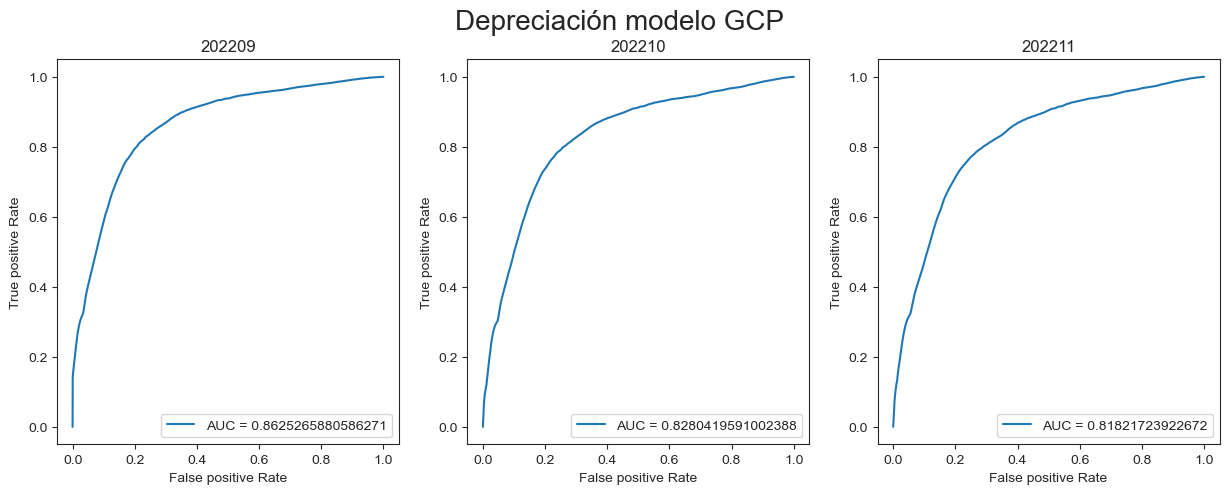

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15, 5))
fig.suptitle('Depreciación modelo GCP',fontsize=20)

ax1.plot(fpr_gcp09,tpr_gcp09,label='AUC = '+str(auc_gcp09))
ax2.plot(fpr_gcp10,tpr_gcp10,label='AUC = '+str(auc_gcp10))
ax3.plot(fpr_gcp11,tpr_gcp11,label='AUC = '+str(auc_gcp11))

ax1.set_title('202209')
ax1.set_ylabel('True positive Rate')
ax1.set_xlabel('False positive Rate')
ax2.set_title('202210')
ax2.set_ylabel('True positive Rate')
ax2.set_xlabel('False positive Rate')
ax3.set_title('202211')
ax3.set_ylabel('True positive Rate')
ax3.set_xlabel('False positive Rate')

ax1.legend(loc = "lower right")
ax2.legend(loc = "lower right")
ax3.legend(loc = "lower right")
plt.show()

## Modelo KPP   -  score 202209

In [90]:
fpr_kpp09, tpr_kpp09, thresholds_kpp09 = metrics.roc_curve(list(tablon['CONV_202209']),list(tablon['SC_MODELO_OLD']))
fpr_kpp10, tpr_kpp10, thresholds_kpp10 = metrics.roc_curve(list(tablon['CONV_202210']),list(tablon['SC_MODELO_OLD']))
fpr_kpp11, tpr_kpp11, thresholds_kpp11 = metrics.roc_curve(list(tablon['CONV_202211']),list(tablon['SC_MODELO_OLD']))

auc_kpp09 = metrics.roc_auc_score(list(tablon['CONV_202209']),list(tablon['SC_MODELO_OLD']))
auc_kpp10 = metrics.roc_auc_score(list(tablon['CONV_202210']),list(tablon['SC_MODELO_OLD']))
auc_kpp11 = metrics.roc_auc_score(list(tablon['CONV_202211']),list(tablon['SC_MODELO_OLD']))

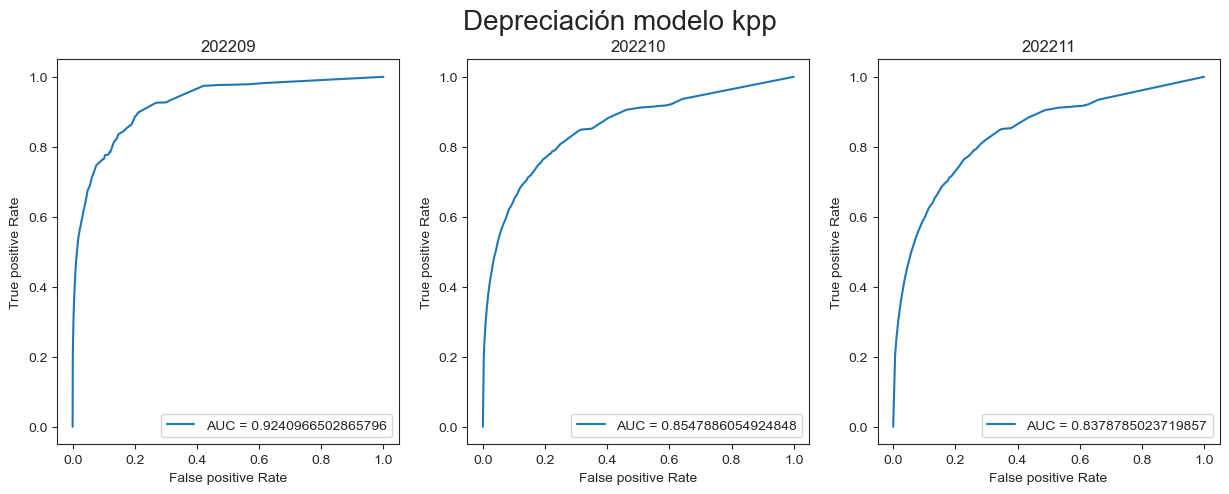

In [91]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15, 5))
fig.suptitle('Depreciación modelo kpp',fontsize=20)

ax1.plot(fpr_kpp09,tpr_kpp09,label='AUC = '+str(auc_kpp09))
ax2.plot(fpr_kpp10,tpr_kpp10,label='AUC = '+str(auc_kpp10))
ax3.plot(fpr_kpp11,tpr_kpp11,label='AUC = '+str(auc_kpp11))


ax1.set_title('202209')
ax1.set_ylabel('True positive Rate')
ax1.set_xlabel('False positive Rate')
ax2.set_title('202210')
ax2.set_ylabel('True positive Rate')
ax2.set_xlabel('False positive Rate')
ax3.set_title('202211')
ax3.set_ylabel('True positive Rate')
ax3.set_xlabel('False positive Rate')

ax1.legend(loc = "lower right")
ax2.legend(loc = "lower right")
ax3.legend(loc = "lower right")
plt.show()

## bines GCP

In [17]:
gcp = gcp.sort_values(by="MODELO_GCP_BIN")

In [18]:
gcp

,MODELO_GCP_BIN,Q_CLI,RR_202209,RR_202210,RR_202211
4,1,382105,0.049,0.076,0.062
8,2,390206,0.060,0.081,0.069
9,3,386155,0.064,0.077,0.070
5,4,386155,0.097,0.117,0.108
6,5,386118,0.175,0.182,0.164
7,6,386193,0.287,0.283,0.211
3,7,384594,0.504,0.488,0.382
2,8,387715,0.646,0.614,0.545
0,9,386151,0.679,0.648,0.565
1,10,386160,0.901,0.819,0.770


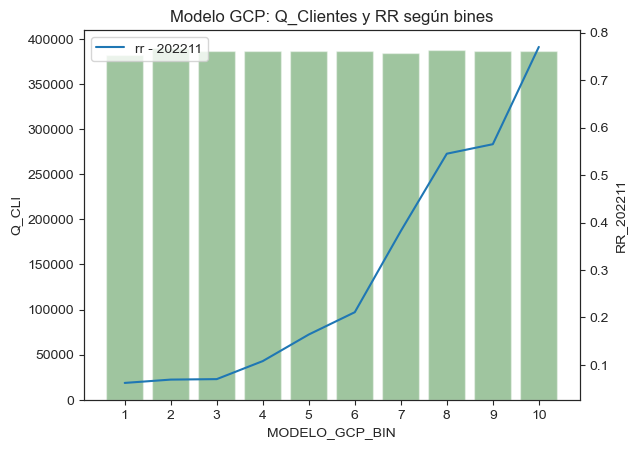

In [155]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style="ticks")

fig, ax1= plt.subplots()

ax1 = sns.barplot(x=gcp["MODELO_GCP_BIN"],y = gcp["Q_CLI"], alpha=0.4, color="green")
ax1.set_title('Modelo GCP: Q_Clientes y RR según bines')
ax2 = ax1.twinx()
ax2 = sns.lineplot(data = gcp, x=gcp["MODELO_GCP_BIN"]-1, y = gcp["RR_202211"], label="rr - 202211")
plt.show()

## bines KPP

In [126]:
kpp = kpp.sort_values(by="MODELO_OLD_BIN")

In [127]:
kpp

,MODELO_OLD_BIN,Q_CLI,RR_202209,RR_202210,RR_202211
3,1,1156359,0.025,0.092,0.081
7,2,338282,0.015,0.046,0.039
2,3,368829,0.172,0.194,0.162
6,4,450573,0.240,0.222,0.196
1,5,378993,0.384,0.355,0.306
4,6,369511,0.655,0.532,0.430
5,7,411902,0.879,0.761,0.641
0,8,387103,0.987,0.951,0.887


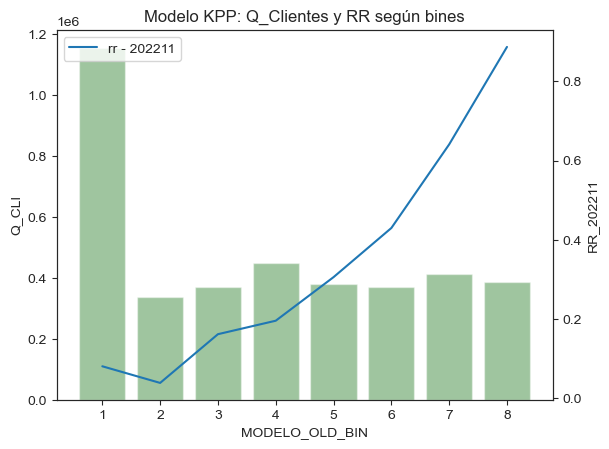

In [156]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style="ticks")

fig, ax1= plt.subplots()

ax1 = sns.barplot(x=kpp["MODELO_OLD_BIN"],y = kpp["Q_CLI"], alpha=0.4, color="green")
ax1.set_title('Modelo KPP: Q_Clientes y RR según bines')
ax2 = ax1.twinx()
ax2 = sns.lineplot(data = kpp, x=kpp["MODELO_OLD_BIN"]-1, y = kpp["RR_202211"], label="rr - 202211")
plt.show()